## 導入 pandas & numpy package 及讀取資料

 Pandas 使用說明文件：http://pandas.pydata.org/pandas-docs/stable/
 
 Numpy 使用說明文件：https://docs.scipy.org/doc/numpy/user/quickstart.html

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 顧客基本屬性資料 (187,679筆)
cust_atri = pd.read_csv("TBN_CIF.csv") 

# 顧客網頁瀏覽行為 (2,209,864筆)
cust_behav = pd.read_csv("TBN_CUST_BEHAVIOR.csv")

# 信用卡申請檔案 (54,393筆)
cc_apply = pd.read_csv("TBN_CC_APPLY.csv")

# 信用貸款申請檔案 (6,741筆)
ln_apply = pd.read_csv("TBN_LN_APPLY.csv") 

# 顧客外匯交易資料 (507,185筆)
FX_trans = pd.read_csv("TBN_FX_TXN.csv") 

# 信託產品交易資料 (36,763筆)
WM_trans = pd.read_csv("TBN_WM_TXN.csv") 

# 顧客最近一次交易時間 (Y)
Last_trans = pd.read_csv("TBN_RECENT_DT.csv") 

# tatget data 
T = pd.read_csv("TBN_Y_ZERO.csv") 

print("成功讀取！")

成功讀取


## 資料預先處理 / Data Preprocessing

In [4]:
# 找出共有多少客戶
tcn = cust_behav['CUST_NO'].unique()
print(len(tcn))

# 找出共有多少不一樣的網站連結
website = cust_behav['PAGE'].unique()
print(len(website))

195000
782


In [10]:
#依照拜訪日期進行排序
GG= cust_behav.sort_values(by='VISITDATE')

In [11]:
# 修改 網址 (考慮由782個網站中分成 5類 or 52類)  --- c = set(c)
GG_C = set(GG['PAGE'])
GG_C = list(GG_C)

# 透過 for-loop 切割網址來剖析使用者瀏覽網站類別
c=[]
for i in GG_C:
    s = i.split('/')[3]  #+i.split('/')[4]  ---先分成五類，故不增加第四個切割文字
    c.append(s)

In [12]:
# 網址 分類對照表
df = pd.DataFrame(list(zip(GG_C, c)),columns = ['PAGE','category'])
df.head()

,PAGE,category
0,https://www.esunbank.com.tw/edrn/pgusordq/cugf...,edrn
1,https://www.esunbank.com.tw/edrn/deoxt/drroxrc...,edrn
2,https://www.esunbank.com.tw/gygrt/wgdqth/ixrfu...,gygrt
3,http://www.esunbank.com.tw/gygrt/cugfkt/106032...,gygrt
4,https://www.esunbank.com.tw/edrn/pgusordq/cugf...,edrn


In [13]:
# 將瀏覽網址類別(Category) merge 進入原始 Data
cust_behav_pro = cust_behav.merge(df,on='PAGE')
cust_behav_pro.head()

,CUST_NO,VISITDATE,PAGE,category
0,AZTHNWQ_LXMGIMYG,9462,http://www.esunbank.com.tw/gygrt/e2c/iougkjr/,gygrt
1,RR7JPKHFOQJ5RAKC,9486,http://www.esunbank.com.tw/gygrt/e2c/iougkjr/,gygrt
2,DX-ULHMCEG2BBHV4,9459,http://www.esunbank.com.tw/gygrt/e2c/iougkjr/,gygrt
3,0V9LA8JSWLBAGWTC,9518,http://www.esunbank.com.tw/gygrt/e2c/iougkjr/,gygrt
4,3KQEIBZKZTBTQFLM,9484,http://www.esunbank.com.tw/gygrt/e2c/iougkjr/,gygrt


In [14]:
# 切成四份 data (區別瀏覽時間，分別為 0-30天, 30-60天, 60-90天 90-120天 → 以準備訓練資料集)
p1 = cust_behav_pro[cust_behav_pro['VISITDATE']<9478]
p2 = cust_behav_pro[cust_behav_pro['VISITDATE'].between(9478,9507)]
p3 = cust_behav_pro[cust_behav_pro['VISITDATE'].between(9508,9537)]
p4 = cust_behav_pro[cust_behav_pro['VISITDATE'].between(9538,9567)]
print(len(p1))
print(len(p2))
print(len(p3))
print(len(p4))

760446
601314
649891
198213


In [15]:
# 轉換(Category)欄位，以利後續神經網路資料輸入 (轉換為網站類別的點擊次數)
d1 = pd.get_dummies(p1['category'])
d1['CUST_NO'] = p1['CUST_NO']

#根據用戶 ID 計算不同網站的點擊次數
dh1 = d1.groupby('CUST_NO').sum()
dh1.reset_index(inplace = True)
dh1.head()

,CUST_NO,edrn,fgmo,gpda,gygrt,s,wgdqth
0,---CHVW7DUN8SZLO,2.0,0.0,0.0,1.0,0.0,0.0
1,--1YNJZSSOXDF6UU,2.0,0.0,0.0,3.0,0.0,0.0
2,--2YJM1RA5I5NQBC,1.0,0.0,0.0,0.0,0.0,0.0
3,--3NF5SUEEEAWOPI,2.0,0.0,0.0,0.0,0.0,0.0
4,--8BVNAAVAUSW6X8,2.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 查看資料現況
dh1.describe()
# 極端值 → 有人點了五千多次網頁= =

,edrn,fgmo,gpda,gygrt,s,wgdqth
count,92858.000000,92858.000000,92858.000000,92858.000000,92858.000000,92858.000000
mean,6.823106,0.000635,0.005665,0.988186,0.371729,0.000022
std,43.854861,0.036390,0.294564,2.361874,1.722879,0.006563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5147.000000,4.000000,54.000000,207.000000,92.000000,2.000000


In [17]:
# 重複 dh1 的作法，使用在 dh2, dh3, dh4

d2 = pd.get_dummies(p2['category'])
d2['CUST_NO'] = p2['CUST_NO']
dh2 = d2.groupby('CUST_NO').sum()
dh2.reset_index(inplace = True)
dh2
d3 = pd.get_dummies(p3['category'])
d3['CUST_NO'] = p3['CUST_NO']
dh3 = d3.groupby('CUST_NO').sum()
dh3.reset_index(inplace = True)
dh3
d4 = pd.get_dummies(p4['category'])
d4['CUST_NO'] = p4['CUST_NO']
dh4 = d4.groupby('CUST_NO').sum()
dh4.reset_index(inplace = True)
dh4.describe()

########### 顧客行為 資料 dh1, dh2, dh3, dh4 (training data_part) #############

,edrn,fgmo,gpda,gygrt,s,wgdqth
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5.146533,0.000467,0.003433,1.169267,0.287267,0.000133
std,20.287079,0.027077,0.127627,2.114970,1.452956,0.023094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1662.000000,2.000000,10.000000,70.000000,49.000000,4.000000


In [18]:
# loan Apply Part / 貸款申請 Data
LA = set(ln_apply['CUST_NO'])
print(len(LA))
ln_apply.head()

6654


,CUST_NO,TXN_DT,LN_AMT,LN_USE
0,JZKEGB1J3FEPXGWA,9455,904731,06
1,TKTH9UXLWDVLA8E4,9472,1218170,01
2,KZ0XPLZI-NGTHTDE,9505,1183088,01
3,BT5INBWYOZQK8CDY,9457,848097,05
4,Z5H7IUX8VPUMWWY8,9473,848097,01


In [19]:
# 找出重複申請
lln = ln_apply.groupby(by='CUST_NO').sum()
lln.sort_values('TXN_DT',ascending = False)
llnx = lln[lln['TXN_DT']>10000]
# 84 人 重複申請貸款兩次


In [20]:
# 依據時間區段，切割資料
ln_apply = ln_apply.rename(columns={'TXN_DT':'LN_TXN_DT'})
pl1 = ln_apply[ln_apply['LN_TXN_DT']<9478]
pl2 = ln_apply[ln_apply['LN_TXN_DT'].between(9478,9507)]
pl3 = ln_apply[ln_apply['LN_TXN_DT'].between(9508,9537)]
pl4 = ln_apply[ln_apply['LN_TXN_DT'].between(9538,9567)]
print(len(pl1))
print(len(pl2))
print(len(pl3))
print(len(pl4))

1817
1238
1845
1841


In [21]:
# print(len(set(pl1['CUST_NO'])))
# 清除同一時間區間，同一人之重複借貸，取最新、最大值
pl1_p = pl1.groupby(by='CUST_NO').max()
# 清除同一時間區間，同一人之重複借貸，取加總值
pl1_px = pl1.groupby(by='CUST_NO').sum()
# LN_AMT 取區間加總值，貸款次數 & 時間 則取最大值
pl1_p['LN_AMT'] = pl1_px['LN_AMT']
pl1_p.reset_index(inplace = True)

# 清除同一時間區間，同一人之重複借貸，取最新、最大值
pl2_p = pl2.groupby(by='CUST_NO').max()
# 清除同一時間區間，同一人之重複借貸，取加總值
pl2_px = pl2.groupby(by='CUST_NO').sum()
# LN_AMT 取區間加總值，貸款次數 & 時間 則取最大值
pl2_p['LN_AMT'] = pl2_px['LN_AMT']
pl2_p.reset_index(inplace = True)

# 清除同一時間區間，同一人之重複借貸，取最新、最大值
pl3_p = pl3.groupby(by='CUST_NO').max()
# 清除同一時間區間，同一人之重複借貸，取加總值
pl3_px = pl3.groupby(by='CUST_NO').sum()
# LN_AMT 取區間加總值，貸款次數 & 時間 則取最大值
pl3_p['LN_AMT'] = pl3_px['LN_AMT']
pl3_p.reset_index(inplace = True)

# 清除同一時間區間，同一人之重複借貸，取最新、最大值
pl4_p = pl4.groupby(by='CUST_NO').max()
# 清除同一時間區間，同一人之重複借貸，取加總值
pl4_px = pl4.groupby(by='CUST_NO').sum()
# LN_AMT 取區間加總值，貸款次數 & 時間 則取最大值
pl4_p['LN_AMT'] = pl4_px['LN_AMT']
pl4_p.reset_index(inplace = True)

pl1_p

,CUST_NO,LN_TXN_DT,LN_AMT,LN_USE
0,-1V5YVOHU4MRXNZO,9473,805996,02
1,-2JETLOIT2WLFXVI,9477,892709,07
2,-4POSWFYU0VK78CG,9465,960619,06
3,-5KOC_BN-JCAN39O,9473,777569,02
4,-6EEPTBHEDMECTHM,9464,904731,18
5,-9AFVPCHBM-MFYBY,9458,935465,14
6,-AHHJBEMPD7L5MDW,9477,988495,06
7,-AVM1SF6TFBKQYRO,9462,988495,07
8,-CAZAOHBU8VFBY9I,9450,848097,14
9,-EFNP1NTGHSEK__C,9472,848097,02


In [22]:
# 資料正規化 (除以標準差)
pl1_p['LN_AMT'] = pl1_p['LN_AMT'] / ln_apply['LN_AMT'].std()
pl2_p['LN_AMT'] = pl2_p['LN_AMT'] / ln_apply['LN_AMT'].std()
pl3_p['LN_AMT'] = pl3_p['LN_AMT'] / ln_apply['LN_AMT'].std()
pl4_p['LN_AMT'] = pl4_p['LN_AMT'] / ln_apply['LN_AMT'].std()

pl1_p['LN_AMT']

0        7.971790
1        8.829435
2        9.501106
3        7.690630
4        8.948339
5        9.252317
6        9.776816
7        9.776816
8        8.388195
9        8.388195
10       9.340265
11       8.948339
12       8.388195
13       8.388195
14       8.388195
15       7.971790
16       8.948339
17       8.948339
18       7.313481
19       7.971790
20       9.158367
21       8.388195
22       8.948339
23       9.158367
24      10.691529
25       9.340265
26       8.948339
27       9.776816
28       8.197969
29       8.388195
          ...    
1775     8.197969
1776     8.948339
1777     8.948339
1778     8.698621
1779    10.300870
1780     8.388195
1781     7.971790
1782     8.388195
1783     7.690630
1784     8.948339
1785     8.948339
1786     8.197969
1787     8.948339
1788     8.388195
1789     7.971790
1790     7.313481
1791     8.948339
1792     9.776816
1793     8.698621
1794     7.690630
1795     7.690630
1796     7.971790
1797     8.388195
1798     8.948339
1799     8

In [24]:
# 信託產品 Part 
# 認識 overall Data
WM_trans.describe()

,WM_TXN_DT,CUST_RISK_CODE,INVEST_TYPE_CODE,WM_TXN_AMT
count,36763.000000,36676.000000,36763.000000,3.676300e+04
mean,9505.668580,3.705393,1.210891,6.830331e+05
std,34.779816,0.504912,0.407947,4.032272e+05
min,9449.000000,1.000000,1.000000,1.000000e+04
25%,9476.000000,3.000000,1.000000,4.391910e+05
50%,9504.000000,4.000000,1.000000,6.058850e+05
75%,9535.000000,4.000000,1.000000,8.547670e+05
max,9567.000000,4.000000,2.000000,6.608125e+06


In [25]:
# 修改時間欄位名稱
WM_trans = WM_trans.rename(columns={'TXN_DT':'WM_TXN_DT'})
WM_trans
# → 客戶編號有重複值

,CUST_NO,WM_TXN_DT,CUST_RISK_CODE,INVEST_TYPE_CODE,WM_TXN_AMT
0,83A1N8HQ4CLT56IY,9476,3.0,2,270684
1,B8ZNLMVWJOHCJ7LY,9546,3.0,2,254794
2,-O2NVMT-W0WJHEAQ,9521,3.0,2,797298
3,NRVZ15KRUYBNVLX0,9490,4.0,2,439191
4,GAP3CQTQ-3K8OAHM,9513,4.0,2,137037
5,IQAYHLFYJGS7I6AI,9525,4.0,2,505049
6,VUDTJZYRXZFQXE2I,9464,4.0,2,137037
7,OSYKGFITHMN-PB4K,9511,4.0,2,336670
8,DTQWITQ8OWL75KUQ,9463,4.0,2,605885
9,BCXKB8HF7LUJ6IO0,9519,4.0,2,605885


In [26]:
# 信託交易金額正規劃
WM_trans['WM_TXN_AMT'] = WM_trans['WM_TXN_AMT'] / WM_trans['WM_TXN_AMT'].std()
# 處理投資產品類別的欄位 (方便後續計算購買次數)
WM_trans_p = pd.get_dummies(WM_trans['INVEST_TYPE_CODE'])
WM_trans_p['CUST_NO'] = WM_trans['CUST_NO']
WM_trans_p['WM_TXN_DT'] = WM_trans['WM_TXN_DT']
WM_trans_p['CUST_RISK_CODE'] = WM_trans['CUST_RISK_CODE']
WM_trans_p['WM_TXN_AMT'] = WM_trans['WM_TXN_AMT']
WM_trans_p = WM_trans_p.rename(columns = {1:'WM_type_1',2:'WM_type_2'})
WM_trans_p

,WM_type_1,WM_type_2,CUST_NO,WM_TXN_DT,CUST_RISK_CODE,WM_TXN_AMT
0,0,1,83A1N8HQ4CLT56IY,9476,3.0,0.671294
1,0,1,B8ZNLMVWJOHCJ7LY,9546,3.0,0.631887
2,0,1,-O2NVMT-W0WJHEAQ,9521,3.0,1.977292
3,0,1,NRVZ15KRUYBNVLX0,9490,4.0,1.089190
4,0,1,GAP3CQTQ-3K8OAHM,9513,4.0,0.339851
5,0,1,IQAYHLFYJGS7I6AI,9525,4.0,1.252517
6,0,1,VUDTJZYRXZFQXE2I,9464,4.0,0.339851
7,0,1,OSYKGFITHMN-PB4K,9511,4.0,0.834939
8,0,1,DTQWITQ8OWL75KUQ,9463,4.0,1.502590
9,0,1,BCXKB8HF7LUJ6IO0,9519,4.0,1.502590


In [27]:
# 依照時間區間 分割資料
pm1 = WM_trans_p[WM_trans_p['WM_TXN_DT']<9478]
pm2 = WM_trans_p[WM_trans_p['WM_TXN_DT'].between(9478,9507)]
pm3 = WM_trans_p[WM_trans_p['WM_TXN_DT'].between(9508,9537)]
pm4 = WM_trans_p[WM_trans_p['WM_TXN_DT'].between(9538,9567)]
print(len(pm1))
print(len(pm2))
print(len(pm3))
print(len(pm4))

9986
9517
8674
8586


In [28]:
# 取最大值，抓出最近一次交易時間
pm1_px = pm1.groupby(by='CUST_NO').max()
# 加總交易次數 & 交易金額
pm1_p = pm1.groupby(by='CUST_NO').sum()
# 區間內，最近一次交易時間
pm1_p['WM_TXN_DT']=pm1_px['WM_TXN_DT']
# 區間內，客戶最大的交易風險類別
pm1_p['CUST_RISK_CODE']=pm1_px['CUST_RISK_CODE']
pm1_p.reset_index(inplace = True)


pm2_px = pm2.groupby(by='CUST_NO').max()
pm2_p = pm2.groupby(by='CUST_NO').sum()
pm2_p['WM_TXN_DT']=pm2_px['WM_TXN_DT']
pm2_p['CUST_RISK_CODE']=pm2_px['CUST_RISK_CODE']
pm2_p.reset_index(inplace = True)


pm3_px = pm3.groupby(by='CUST_NO').max()
pm3_p = pm3.groupby(by='CUST_NO').sum()
pm3_p['WM_TXN_DT']=pm3_px['WM_TXN_DT']
pm3_p['CUST_RISK_CODE']=pm3_px['CUST_RISK_CODE']
pm3_p.reset_index(inplace = True)


pm4_px = pm4.groupby(by='CUST_NO').max()
pm4_p = pm4.groupby(by='CUST_NO').sum()
pm4_p['WM_TXN_DT']=pm4_px['WM_TXN_DT']
pm4_p['CUST_RISK_CODE']=pm4_px['CUST_RISK_CODE']
pm4_p.reset_index(inplace = True)

print(len(pm1_p))
print(len(pm2_p))
print(len(pm3_p))
print(len(pm4_p))

pm4_p


5153
5010
5008
5310


,CUST_NO,WM_type_1,WM_type_2,WM_TXN_DT,CUST_RISK_CODE,WM_TXN_AMT
0,-0XO58X64I07YHSS,1,0,9548,4.0,1.502590
1,-1BGZMAVZBJUF97S,0,1,9546,4.0,1.502590
2,-2LGJH2HFLAGXR8K,1,0,9561,4.0,1.343119
3,-2Y2CGXYI07_DULQ,1,1,9550,4.0,1.592368
4,-307MHUQQ-QLJEJS,1,0,9555,4.0,1.665770
5,-3TXGRP9YK0ZKFGY,1,0,9563,4.0,1.179114
6,-53RVI1FPE0DH7XG,2,0,9561,4.0,3.005179
7,-6CCR83YDAFZJG98,2,0,9560,3.0,4.754426
8,-75A8U4FTQGKNRXS,1,0,9549,3.0,1.502590
9,-8WS1FTQUR5MG8KG,1,0,9550,3.0,1.510255


In [29]:
# Credit Card Part / 信用卡資料
cc_apply = cc_apply.rename(columns={'TXN_DT':'cc_TXN_DT'})
# 根據時間 切割資料
pc1 = cc_apply[cc_apply['cc_TXN_DT']<9478]
pc2 = cc_apply[cc_apply['cc_TXN_DT'].between(9478,9507)]
pc3 = cc_apply[cc_apply['cc_TXN_DT'].between(9508,9537)]
pc4 = cc_apply[cc_apply['cc_TXN_DT'].between(9538,9567)]
# print(len(pc1))
# print(len(pc2))
# print(len(pc3))
# print(len(pc4))

# 去除當日重複申請 (redundant data remove)
pc1 = pc1.drop_duplicates()
pc2 = pc2.drop_duplicates()
pc3 = pc3.drop_duplicates()
pc4 = pc4.drop_duplicates()
# print(len(pc1))

# 增加新欄位，方便後續計算客戶信用卡申請次數
pc1['cc_times'] = 1
pc2['cc_times'] = 1
pc3['cc_times'] = 1
pc4['cc_times'] = 1

# 抓出最近一次信用卡申請時間
pc1_p = pc1.groupby(by='CUST_NO').max()
# 計算信用卡申請次數
pc1_px = pc1.groupby(by='CUST_NO').sum()
pc1_p['cc_times'] = pc1_px['cc_times']
pc1_p.reset_index(inplace=True)

pc2_p = pc2.groupby(by='CUST_NO').max()
pc2_px = pc2.groupby(by='CUST_NO').sum()
pc2_p['cc_times'] = pc2_px['cc_times']
pc2_p.reset_index(inplace=True)

pc3_p = pc3.groupby(by='CUST_NO').max()
pc3_px = pc3.groupby(by='CUST_NO').sum()
pc3_p['cc_times'] = pc3_px['cc_times']
pc3_p.reset_index(inplace=True)

pc4_p = pc4.groupby(by='CUST_NO').max()
pc4_px = pc4.groupby(by='CUST_NO').sum()
pc4_p['cc_times'] = pc4_px['cc_times']
pc4_p.reset_index(inplace=True)

# print(len(pc1_p))
# print(len(pc2_p))
# print(len(pc3_p))
# print(len(pc4_p))

pc4_p

,CUST_NO,cc_TXN_DT,cc_times
0,--37ZQ9XGUMXZASK,9539,1
1,--AKTEGTKD38U3BY,9563,1
2,-0-XGRRUNL7NZO1A,9557,1
3,-0HHVJDT2E-MY6J0,9554,1
4,-0IKEQWLXATC0O3I,9540,1
5,-0TSTP69E9JIT1IE,9562,1
6,-1FHLJCBZSGCHQ8C,9546,1
7,-1TYGJRMLGRGJ_WA,9552,1
8,-1WRSRDEMUHGT8NC,9560,1
9,-1YNSKE-MCMSTYM4,9547,1


In [34]:
# fx = 外匯 part
FX_trans = FX_trans.rename(columns={'TXN_DT':'FX_TXN_DT'})
FX_trans['FX_TXN_AMT'] = FX_trans['FX_TXN_AMT']/FX_trans['FX_TXN_AMT'].std()
px1 = FX_trans[FX_trans['FX_TXN_DT']<9478]
px2 = FX_trans[FX_trans['FX_TXN_DT'].between(9478,9507)]
px3 = FX_trans[FX_trans['FX_TXN_DT'].between(9508,9537)]
px4 = FX_trans[FX_trans['FX_TXN_DT'].between(9538,9567)]
print(len(px1))
print(len(px2))
print(len(px3))
print(len(px4))
px1['FX_times'] = 1
px2['FX_times'] = 1
px3['FX_times'] = 1
px4['FX_times'] = 1

px1_p = px1.groupby('CUST_NO').sum()
px1_px = px1.groupby('CUST_NO').max()
px1_p['FX_TXN_DT'] = px1_px['FX_TXN_DT']
px1_p.reset_index(inplace=True)

px2_p = px2.groupby('CUST_NO').sum()
px2_px = px2.groupby('CUST_NO').max()
px2_p['FX_TXN_DT'] = px2_px['FX_TXN_DT']
px2_p.reset_index(inplace=True)

px3_p = px3.groupby('CUST_NO').sum()
px3_px = px3.groupby('CUST_NO').max()
px3_p['FX_TXN_DT'] = px3_px['FX_TXN_DT']
px3_p.reset_index(inplace=True)

px4_p = px4.groupby('CUST_NO').sum()
px4_px = px4.groupby('CUST_NO').max()
px4_p['FX_TXN_DT'] = px4_px['FX_TXN_DT']
px4_p.reset_index(inplace=True)
print(len(px1_p))
print(len(px2_p))
print(len(px3_p))
print(len(px4_p))
px4_p

190077
94292
133614
89202


C:\Users\KenChen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\KenChen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\KenChen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

46634
24881
31486
21509


,CUST_NO,FX_TXN_DT,FX_TXN_AMT,FX_times
0,--0PHCW9D_3SAAFS,9560,0.672957,1
1,--DQ9OSIQ6MMBHD0,9548,0.862045,1
2,--NYXRPESVALBKQ8,9540,0.766962,1
3,--P5ESKCOUZUEM5S,9564,1.699409,2
4,--YAOF_PIWXNB1IK,9547,0.623055,1
5,-05IO_N5EGETY8G0,9567,3.057731,2
6,-0B7ZP-LIVPR3KJ4,9554,1.332967,1
7,-0BFBMX2W5Q-JTDY,9564,2.530479,1
8,-0HHVJDT2E-MY6J0,9564,8.076925,7
9,-0INLQN_ONB6_JNY,9567,1.341733,1


In [35]:
# 先抓出最後一次交易時間的標準差 → 方便後續針對時間做正規化
# Last_trans = Last_trans.groupby('CUST_NO').max()
Last_CC_std = Last_trans['CC_RECENT_DT'].std()
Last_FX_std = Last_trans['FX_RECENT_DT'].std()
Last_LN_std = Last_trans['LN_RECENT_DT'].std()
Last_WM_std = Last_trans['WM_RECENT_DT'].std()
# Last_trans

In [36]:
# 上次交易時間 ;除以標準差；以利 模型學習
Last_trans_cleaned = Last_trans
Last_trans_cleaned['CC_RECENT_DT'] = Last_trans['CC_RECENT_DT'] / Last_CC_std
Last_trans_cleaned['FX_RECENT_DT'] = Last_trans['FX_RECENT_DT'] / Last_FX_std
Last_trans_cleaned['LN_RECENT_DT'] = Last_trans['LN_RECENT_DT'] / Last_LN_std
Last_trans_cleaned['WM_RECENT_DT'] = Last_trans['WM_RECENT_DT'] / Last_WM_std
pl1_p.head()

,CUST_NO,LN_TXN_DT,LN_AMT,LN_USE
0,-1V5YVOHU4MRXNZO,9473,7.971790,02
1,-2JETLOIT2WLFXVI,9477,8.829435,07
2,-4POSWFYU0VK78CG,9465,9.501106,06
3,-5KOC_BN-JCAN39O,9473,7.690630,02
4,-6EEPTBHEDMECTHM,9464,8.948339,18


In [37]:
# 製作上一次交易時間 (時間區段 0-30天)
Last_trans_cleaned1 = pd.merge(Last_trans_cleaned, pl1_p, how='outer')
Last_trans_cleaned1 = pd.merge(Last_trans_cleaned1, pm1_p, how='outer')
Last_trans_cleaned1 = pd.merge(Last_trans_cleaned1, pc1_p, how='outer')
Last_trans_cleaned1 = pd.merge(Last_trans_cleaned1, px1_p, how='outer')

Last_trans_cleaned1['LN_RECENT_DT_1'] = Last_trans_cleaned1['LN_TXN_DT'] / Last_LN_std
Last_trans_cleaned1['LN_RECENT_DT_1'] = Last_trans_cleaned1['LN_RECENT_DT_1'].fillna(Last_trans_cleaned1['LN_RECENT_DT'])

Last_trans_cleaned1['CC_RECENT_DT_1'] = Last_trans_cleaned1['cc_TXN_DT'] / Last_CC_std
Last_trans_cleaned1['CC_RECENT_DT_1'] = Last_trans_cleaned1['CC_RECENT_DT_1'].fillna(Last_trans_cleaned1['CC_RECENT_DT'])

Last_trans_cleaned1['FX_RECENT_DT_1'] = Last_trans_cleaned1['FX_TXN_DT'] / Last_FX_std
Last_trans_cleaned1['FX_RECENT_DT_1'] = Last_trans_cleaned1['FX_RECENT_DT_1'].fillna(Last_trans_cleaned1['FX_RECENT_DT'])

Last_trans_cleaned1['WM_RECENT_DT_1'] = Last_trans_cleaned1['WM_TXN_DT'] / Last_WM_std
Last_trans_cleaned1['WM_RECENT_DT_1'] = Last_trans_cleaned1['WM_RECENT_DT_1'].fillna(Last_trans_cleaned1['WM_RECENT_DT'])
# print(Last_trans_cleaned1['LN_RECENT_DT'].sum())
# print(Last_trans_cleaned1['CC_RECENT_DT'].sum())
# print(Last_trans_cleaned1['FX_RECENT_DT'].sum())
# print(Last_trans_cleaned1['WM_RECENT_DT'].sum())
Last_trans_cleaned1 = Last_trans_cleaned1.drop(['CC_RECENT_DT', 'FX_RECENT_DT', 'LN_RECENT_DT','WM_RECENT_DT', 'LN_TXN_DT', 'LN_AMT', 'LN_USE', 'WM_type_1','WM_type_2', 'WM_TXN_DT', 'CUST_RISK_CODE', 'WM_TXN_AMT', 'cc_TXN_DT','cc_times', 'FX_TXN_DT', 'FX_TXN_AMT', 'FX_times'],axis=1)
# print(Last_trans_cleaned1['LN_RECENT_DT_1'].sum())
# print(Last_trans_cleaned1['CC_RECENT_DT_1'].sum())
# print(Last_trans_cleaned1['FX_RECENT_DT_1'].sum())
# print(Last_trans_cleaned1['WM_RECENT_DT_1'].sum())
Last_trans_cleaned1.tail()

,CUST_NO,LN_RECENT_DT_1,CC_RECENT_DT_1,FX_RECENT_DT_1,WM_RECENT_DT_1
227159,__FATZHWBEN9IV3K,NaN,NaN,9455.0,NaN
227160,__LSESFVFGKRFHC4,NaN,NaN,9452.0,NaN
227161,__Q5CSFNJTEDGDVK,NaN,NaN,9473.0,NaN
227162,__QDPYJJZNWADZPY,NaN,NaN,9472.0,NaN
227163,__UKIUKFY3HT5XAK,NaN,NaN,9469.0,NaN


In [38]:
# 製作上一次交易時間 (時間區段 30-60天)
Last_trans_cleaned2 = pd.merge(Last_trans_cleaned1, pl2_p, how='outer')
Last_trans_cleaned2 = pd.merge(Last_trans_cleaned2, pm2_p, how='outer')
Last_trans_cleaned2 = pd.merge(Last_trans_cleaned2, pc2_p, how='outer')
Last_trans_cleaned2 = pd.merge(Last_trans_cleaned2, px2_p, how='outer')

Last_trans_cleaned2['LN_RECENT_DT_2'] = Last_trans_cleaned2['LN_TXN_DT'] / Last_LN_std
Last_trans_cleaned2['LN_RECENT_DT_2'] = Last_trans_cleaned2['LN_RECENT_DT_2'].fillna(Last_trans_cleaned2['LN_RECENT_DT_1'])

Last_trans_cleaned2['CC_RECENT_DT_2'] = Last_trans_cleaned2['cc_TXN_DT'] / Last_CC_std
Last_trans_cleaned2['CC_RECENT_DT_2'] = Last_trans_cleaned2['CC_RECENT_DT_2'].fillna(Last_trans_cleaned2['CC_RECENT_DT_1'])

Last_trans_cleaned2['FX_RECENT_DT_2'] = Last_trans_cleaned2['FX_TXN_DT'] / Last_FX_std
Last_trans_cleaned2['FX_RECENT_DT_2'] = Last_trans_cleaned2['FX_RECENT_DT_2'].fillna(Last_trans_cleaned2['FX_RECENT_DT_1'])

Last_trans_cleaned2['WM_RECENT_DT_2'] = Last_trans_cleaned2['WM_TXN_DT'] / Last_WM_std
Last_trans_cleaned2['WM_RECENT_DT_2'] = Last_trans_cleaned2['WM_RECENT_DT_2'].fillna(Last_trans_cleaned2['WM_RECENT_DT_1'])

Last_trans_cleaned2 = Last_trans_cleaned2.drop(['CC_RECENT_DT_1', 'FX_RECENT_DT_1', 'LN_RECENT_DT_1','WM_RECENT_DT_1', 'LN_TXN_DT', 'LN_AMT', 'LN_USE', 'WM_type_1','WM_type_2', 'WM_TXN_DT', 'CUST_RISK_CODE', 'WM_TXN_AMT', 'cc_TXN_DT','cc_times', 'FX_TXN_DT', 'FX_TXN_AMT', 'FX_times'],axis=1)

Last_trans_cleaned2.tail()

,CUST_NO,LN_RECENT_DT_2,CC_RECENT_DT_2,FX_RECENT_DT_2,WM_RECENT_DT_2
238095,_YN5SHHS3LBEKOZG,NaN,NaN,9497.0,NaN
238096,_YU0Y3FUQNWAXANO,NaN,NaN,9497.0,NaN
238097,_YY8X0N5ZKS3ESZG,NaN,NaN,9479.0,NaN
238098,_ZVSLK3AXAYXZGUQ,NaN,NaN,9481.0,NaN
238099,__GVJJZPCMXBIRV8,NaN,NaN,9500.0,NaN


In [39]:
# 製作上一次交易時間 (時間區段 60-90天)
Last_trans_cleaned3 = pd.merge(Last_trans_cleaned2, pl3_p, how='outer')
Last_trans_cleaned3 = pd.merge(Last_trans_cleaned3, pm3_p, how='outer')
Last_trans_cleaned3 = pd.merge(Last_trans_cleaned3, pc3_p, how='outer')
Last_trans_cleaned3 = pd.merge(Last_trans_cleaned3, px3_p, how='outer')

Last_trans_cleaned3['LN_RECENT_DT_3'] = Last_trans_cleaned3['LN_TXN_DT'] / Last_LN_std
Last_trans_cleaned3['LN_RECENT_DT_3'] = Last_trans_cleaned3['LN_RECENT_DT_3'].fillna(Last_trans_cleaned3['LN_RECENT_DT_2'])

Last_trans_cleaned3['CC_RECENT_DT_3'] = Last_trans_cleaned3['cc_TXN_DT'] / Last_CC_std
Last_trans_cleaned3['CC_RECENT_DT_3'] = Last_trans_cleaned3['CC_RECENT_DT_3'].fillna(Last_trans_cleaned3['CC_RECENT_DT_2'])

Last_trans_cleaned3['FX_RECENT_DT_3'] = Last_trans_cleaned3['FX_TXN_DT'] / Last_FX_std
Last_trans_cleaned3['FX_RECENT_DT_3'] = Last_trans_cleaned3['FX_RECENT_DT_3'].fillna(Last_trans_cleaned3['FX_RECENT_DT_2'])

Last_trans_cleaned3['WM_RECENT_DT_3'] = Last_trans_cleaned3['WM_TXN_DT'] / Last_WM_std
Last_trans_cleaned3['WM_RECENT_DT_3'] = Last_trans_cleaned3['WM_RECENT_DT_3'].fillna(Last_trans_cleaned3['WM_RECENT_DT_2'])

Last_trans_cleaned3 = Last_trans_cleaned3.drop(['CC_RECENT_DT_2', 'FX_RECENT_DT_2', 'LN_RECENT_DT_2','WM_RECENT_DT_2', 'LN_TXN_DT', 'LN_AMT', 'LN_USE', 'WM_type_1','WM_type_2', 'WM_TXN_DT', 'CUST_RISK_CODE', 'WM_TXN_AMT', 'cc_TXN_DT','cc_times', 'FX_TXN_DT', 'FX_TXN_AMT', 'FX_times'],axis=1)
print(len(set(Last_trans_cleaned3['CUST_NO'])))
Last_trans_cleaned3.tail()

249866


,CUST_NO,LN_RECENT_DT_3,CC_RECENT_DT_3,FX_RECENT_DT_3,WM_RECENT_DT_3
249861,_XXUCBEQ1GBPX8EO,NaN,NaN,9529.0,NaN
249862,_YODQOBT56SUUXQG,NaN,NaN,9528.0,NaN
249863,_YYH0HCNWNJUIXI4,NaN,NaN,9521.0,NaN
249864,_ZIUTHXQKRASZEWW,NaN,NaN,9536.0,NaN
249865,_ZJZMYSOOOBB59SM,NaN,NaN,9536.0,NaN


In [40]:
# 製作上一次交易時間 (時間區段 90-120天)
Last_trans_cleaned4 = pd.merge(Last_trans_cleaned3, pl4_p, how='outer')
Last_trans_cleaned4 = pd.merge(Last_trans_cleaned4, pm4_p, how='outer')
Last_trans_cleaned4 = pd.merge(Last_trans_cleaned4, pc4_p, how='outer')
Last_trans_cleaned4 = pd.merge(Last_trans_cleaned4, px4_p, how='outer')

Last_trans_cleaned4['LN_RECENT_DT_4'] = Last_trans_cleaned4['LN_TXN_DT'] / Last_LN_std
Last_trans_cleaned4['LN_RECENT_DT_4'] = Last_trans_cleaned4['LN_RECENT_DT_4'].fillna(Last_trans_cleaned4['LN_RECENT_DT_3'])

Last_trans_cleaned4['CC_RECENT_DT_4'] = Last_trans_cleaned4['cc_TXN_DT'] / Last_CC_std
Last_trans_cleaned4['CC_RECENT_DT_4'] = Last_trans_cleaned4['CC_RECENT_DT_4'].fillna(Last_trans_cleaned4['CC_RECENT_DT_3'])

Last_trans_cleaned4['FX_RECENT_DT_4'] = Last_trans_cleaned4['FX_TXN_DT'] / Last_FX_std
Last_trans_cleaned4['FX_RECENT_DT_4'] = Last_trans_cleaned4['FX_RECENT_DT_4'].fillna(Last_trans_cleaned4['FX_RECENT_DT_3'])

Last_trans_cleaned4['WM_RECENT_DT_4'] = Last_trans_cleaned4['WM_TXN_DT'] / Last_WM_std
Last_trans_cleaned4['WM_RECENT_DT_4'] = Last_trans_cleaned4['WM_RECENT_DT_4'].fillna(Last_trans_cleaned4['WM_RECENT_DT_3'])

Last_trans_cleaned4 = Last_trans_cleaned4.drop(['CC_RECENT_DT_3', 'FX_RECENT_DT_3', 'LN_RECENT_DT_3','WM_RECENT_DT_3', 'LN_TXN_DT', 'LN_AMT', 'LN_USE', 'WM_type_1','WM_type_2', 'WM_TXN_DT', 'CUST_RISK_CODE', 'WM_TXN_AMT', 'cc_TXN_DT','cc_times', 'FX_TXN_DT', 'FX_TXN_AMT', 'FX_times'],axis=1)
print(len(set(Last_trans_cleaned4['CUST_NO'])))
Last_trans_cleaned4.tail()

260362


,CUST_NO,LN_RECENT_DT_4,CC_RECENT_DT_4,FX_RECENT_DT_4,WM_RECENT_DT_4
260357,_XOQMDU7DDKROP_8,NaN,NaN,9564.0,NaN
260358,_XWF-EVUX6VKWFAO,NaN,NaN,9563.0,NaN
260359,_Y0W5TSM0QWW1IEO,NaN,NaN,9563.0,NaN
260360,_YT77E0FRGGN50I4,NaN,NaN,9567.0,NaN
260361,_Z7YYYLH93WUNTB8,NaN,NaN,9550.0,NaN


## Data Integration & Cleaning 資料清理/資料整合

In [41]:
# 整合資料 → 製作第一個區間的訓練資料
cust_atri_1 = pd.merge(cust_atri, dh1, how='right')
cust_atri_1 = pd.merge(cust_atri_1, Last_trans_cleaned1, how='left')
cust_atri_1 = pd.merge(cust_atri_1, pl1_p, how='left')
cust_atri_1 = pd.merge(cust_atri_1, pm1_p, how='left')
cust_atri_1 = pd.merge(cust_atri_1, pc1_p, how='left')
cust_atri_1 = pd.merge(cust_atri_1, px1_p, how='left')
cust_atri_1 = cust_atri_1.drop(['LN_TXN_DT','WM_TXN_DT','cc_TXN_DT','FX_TXN_DT'],axis=1)
print(cust_atri_1.columns)
cust_atri_1.head()
# print(len(set(cust_atri_1['CUST_NO'])))

Index(['CUST_NO', 'AGE', 'CHILDREN_CNT', 'CUST_START_DT', 'EDU_CODE',
       'GENDER_CODE', 'INCOME_RANGE_CODE', 'WORK_MTHS', 'edrn', 'fgmo', 'gpda',
       'gygrt', 's', 'wgdqth', 'LN_RECENT_DT_1', 'CC_RECENT_DT_1',
       'FX_RECENT_DT_1', 'WM_RECENT_DT_1', 'LN_AMT', 'LN_USE', 'WM_type_1',
       'WM_type_2', 'CUST_RISK_CODE', 'WM_TXN_AMT', 'cc_times', 'FX_TXN_AMT',
       'FX_times'],
      dtype='object')


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,edrn,fgmo,...,WM_RECENT_DT_1,LN_AMT,LN_USE,WM_type_1,WM_type_2,CUST_RISK_CODE,WM_TXN_AMT,cc_times,FX_TXN_AMT,FX_times
0,SURN2CDMNHCL4SJC,4.0,0.0,4677.0,2.0,M,2.0,1.0,15.0,0.0,...,17.588816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.631276,14.0
1,OGMWH3NPW4BKLRBU,4.0,0.0,5418.0,3.0,M,2.0,1.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N-_SFRR3-YRF2HRO,1.0,0.0,9221.0,6.0,M,1.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.711025,1.0
3,OBG-DBJQIC2GDPHU,4.0,0.0,7342.0,2.0,M,2.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PVX2PFINERRSM8QY,2.0,0.0,9423.0,3.0,M,2.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# 訓練資料一
# 資料清理 → 處理缺失值 (Missing Value) & 資料常規化 (Normalization) & 處理異常值(Anomaly) 
cust_atri_1['AGE'] = cust_atri_1['AGE'].fillna(float(0))
cust_atri_1['CHILDREN_CNT'] = cust_atri_1['CHILDREN_CNT'].fillna(float(0))

ST = cust_atri_1['CUST_START_DT'].std() 
print(ST)
cust_atri_1['CUST_START_DT'] = cust_atri_1['CUST_START_DT'] / ST  

cust_atri_1['CUST_START_DT'] = cust_atri_1['CUST_START_DT'].fillna(float(-1))
cust_atri_1['EDU_CODE'] = cust_atri_1['EDU_CODE'].fillna(float(0))
cust_atri_1['GENDER_CODE'] = cust_atri_1['GENDER_CODE'].fillna(float(0))
cust_atri_1['GENDER_CODE'] = cust_atri_1['GENDER_CODE'].replace('M',float(1))
cust_atri_1['GENDER_CODE'] = cust_atri_1['GENDER_CODE'].replace('F',float(2))
cust_atri_1['INCOME_RANGE_CODE'] = cust_atri_1['INCOME_RANGE_CODE'].fillna(float(0))
cust_atri_1['WORK_MTHS'] = cust_atri_1['WORK_MTHS'].fillna(float(0))
cust_atri_1['edrn'] = cust_atri_1['edrn'].fillna(float(0))
cust_atri_1['fgmo'] = cust_atri_1['fgmo'].fillna(float(0))
cust_atri_1['gpda'] = cust_atri_1['gpda'].fillna(float(0))
cust_atri_1['gygrt'] = cust_atri_1['gygrt'].fillna(float(0))
cust_atri_1['s'] = cust_atri_1['s'].fillna(float(0))
cust_atri_1['wgdqth'] = cust_atri_1['wgdqth'].fillna(float(0))
cust_atri_1['LN_RECENT_DT_1'] = cust_atri_1['LN_RECENT_DT_1'].fillna(float(-1))
cust_atri_1['CC_RECENT_DT_1'] = cust_atri_1['CC_RECENT_DT_1'].fillna(float(-1))
cust_atri_1['FX_RECENT_DT_1'] = cust_atri_1['FX_RECENT_DT_1'].fillna(float(-1))
cust_atri_1['WM_RECENT_DT_1'] = cust_atri_1['WM_RECENT_DT_1'].fillna(float(-1))
cust_atri_1['LN_AMT'] = cust_atri_1['LN_AMT'].fillna(float(0))
cust_atri_1['LN_USE'] = cust_atri_1['LN_USE'].fillna(float(0))
cust_atri_1['WM_type_1'] = cust_atri_1['WM_type_1'].fillna(float(0))
cust_atri_1['WM_type_2'] = cust_atri_1['WM_type_2'].fillna(float(0))
cust_atri_1['CUST_RISK_CODE'] = cust_atri_1['CUST_RISK_CODE'].fillna(float(0))
cust_atri_1['WM_TXN_AMT'] = cust_atri_1['WM_TXN_AMT'].fillna(float(0))
cust_atri_1['cc_times'] = cust_atri_1['cc_times'].fillna(float(0))
cust_atri_1['FX_TXN_AMT'] = cust_atri_1['FX_TXN_AMT'].fillna(float(0))
cust_atri_1['FX_times'] = cust_atri_1['FX_times'].fillna(float(0))
cust_atri_1

2387.305814010335


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,edrn,fgmo,...,WM_RECENT_DT_1,LN_AMT,LN_USE,WM_type_1,WM_type_2,CUST_RISK_CODE,WM_TXN_AMT,cc_times,FX_TXN_AMT,FX_times
0,SURN2CDMNHCL4SJC,4.0,0.0,1.959112,2.0,1.0,2.0,1.0,15.0,0.0,...,17.588816,0.0,0,0.0,0.0,0.0,0.000000,0.0,23.631276,14.0
1,OGMWH3NPW4BKLRBU,4.0,0.0,2.269504,3.0,1.0,2.0,1.0,13.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,N-_SFRR3-YRF2HRO,1.0,0.0,3.862513,6.0,1.0,1.0,0.0,1.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,2.711025,1.0
3,OBG-DBJQIC2GDPHU,4.0,0.0,3.075433,2.0,1.0,2.0,1.0,0.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,PVX2PFINERRSM8QY,2.0,0.0,3.947127,3.0,1.0,2.0,1.0,1.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
5,I_GRJRKLKACIKHHG,4.0,0.0,0.421396,3.0,1.0,4.0,2.0,25.0,0.0,...,20.354191,0.0,0,0.0,0.0,0.0,0.000000,0.0,11.241024,3.0
6,B4BH9EKO5RBS8E6S,4.0,0.0,2.362496,3.0,2.0,1.0,1.0,1.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
7,_0SIAALKRYHUOZB8,3.0,0.0,3.064124,2.0,2.0,2.0,1.0,7.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,1.169684,1.0
8,JSGRQYFBMIDNAZPC,4.0,0.0,0.444015,4.0,1.0,1.0,1.0,0.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
9,4YRX4HXYFYVB1T0Y,4.0,0.0,2.117031,6.0,1.0,4.0,2.0,47.0,0.0,...,19.573328,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [43]:
# 整合資料 → 製作第二個區間的訓練資料
cust_atri_2 = pd.merge(cust_atri, dh2, how='right')
cust_atri_2['wgdqth'] = float(0)
cust_atri_2 = pd.merge(cust_atri_2, Last_trans_cleaned2, how='left')
cust_atri_2 = pd.merge(cust_atri_2, pl2_p, how='left')
cust_atri_2 = pd.merge(cust_atri_2, pm2_p, how='left')
cust_atri_2 = pd.merge(cust_atri_2, pc2_p, how='left')
cust_atri_2 = pd.merge(cust_atri_2, px2_p, how='left')
cust_atri_2 = cust_atri_2.drop(['LN_TXN_DT','WM_TXN_DT','cc_TXN_DT','FX_TXN_DT'],axis=1)
print(cust_atri_2.columns)
print(len(set(cust_atri_2['CUST_NO'])))
# cust_atri_2.

Index(['CUST_NO', 'AGE', 'CHILDREN_CNT', 'CUST_START_DT', 'EDU_CODE',
       'GENDER_CODE', 'INCOME_RANGE_CODE', 'WORK_MTHS', 'edrn', 'fgmo', 'gpda',
       'gygrt', 's', 'wgdqth', 'LN_RECENT_DT_2', 'CC_RECENT_DT_2',
       'FX_RECENT_DT_2', 'WM_RECENT_DT_2', 'LN_AMT', 'LN_USE', 'WM_type_1',
       'WM_type_2', 'CUST_RISK_CODE', 'WM_TXN_AMT', 'cc_times', 'FX_TXN_AMT',
       'FX_times'],
      dtype='object')
86911


In [44]:
# 訓練資料二
# 資料清理 → 處理缺失值 (Missing Value) & 資料常規化 (Normalization) & 處理異常值(Anomaly) 
cust_atri_2['AGE'] = cust_atri_2['AGE'].fillna(float(0))
cust_atri_2['CHILDREN_CNT'] = cust_atri_2['CHILDREN_CNT'].fillna(float(0))
ST2 = cust_atri_2['CUST_START_DT'].std()   ### 每一次執行一次
print(ST2)
cust_atri_2['CUST_START_DT'] = cust_atri_2['CUST_START_DT'] / ST2  ### 每一次執行一次
cust_atri_2['CUST_START_DT'] = cust_atri_2['CUST_START_DT'].fillna(float(-1))
cust_atri_2['EDU_CODE'] = cust_atri_2['EDU_CODE'].fillna(float(0))
cust_atri_2['GENDER_CODE'] = cust_atri_2['GENDER_CODE'].fillna(float(0))
cust_atri_2['GENDER_CODE'] = cust_atri_2['GENDER_CODE'].replace('M',float(1))
cust_atri_2['GENDER_CODE'] = cust_atri_2['GENDER_CODE'].replace('F',float(2))
cust_atri_2['INCOME_RANGE_CODE'] = cust_atri_2['INCOME_RANGE_CODE'].fillna(float(0))
cust_atri_2['WORK_MTHS'] = cust_atri_2['WORK_MTHS'].fillna(float(0))
cust_atri_2['edrn'] = cust_atri_2['edrn'].fillna(float(0))
cust_atri_2['fgmo'] = cust_atri_2['fgmo'].fillna(float(0))
cust_atri_2['gpda'] = cust_atri_2['gpda'].fillna(float(0))
cust_atri_2['gygrt'] = cust_atri_2['gygrt'].fillna(float(0))
cust_atri_2['s'] = cust_atri_2['s'].fillna(float(0))
cust_atri_2['wgdqth'] = cust_atri_2['wgdqth'].fillna(float(0))
cust_atri_2['LN_RECENT_DT_2'] = cust_atri_2['LN_RECENT_DT_2'].fillna(float(-1))
cust_atri_2['CC_RECENT_DT_2'] = cust_atri_2['CC_RECENT_DT_2'].fillna(float(-1))
cust_atri_2['FX_RECENT_DT_2'] = cust_atri_2['FX_RECENT_DT_2'].fillna(float(-1))
cust_atri_2['WM_RECENT_DT_2'] = cust_atri_2['WM_RECENT_DT_2'].fillna(float(-1))
cust_atri_2['LN_AMT'] = cust_atri_2['LN_AMT'].fillna(float(0))
cust_atri_2['LN_USE'] = cust_atri_2['LN_USE'].fillna(float(0))
cust_atri_2['WM_type_1'] = cust_atri_2['WM_type_1'].fillna(float(0))
cust_atri_2['WM_type_2'] = cust_atri_2['WM_type_2'].fillna(float(0))
cust_atri_2['CUST_RISK_CODE'] = cust_atri_2['CUST_RISK_CODE'].fillna(float(0))
cust_atri_2['WM_TXN_AMT'] = cust_atri_2['WM_TXN_AMT'].fillna(float(0))
cust_atri_2['cc_times'] = cust_atri_2['cc_times'].fillna(float(0))
cust_atri_2['FX_TXN_AMT'] = cust_atri_2['FX_TXN_AMT'].fillna(float(0))
cust_atri_2['FX_times'] = cust_atri_2['FX_times'].fillna(float(0))
cust_atri_2

2382.290210495346


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,edrn,fgmo,...,WM_RECENT_DT_2,LN_AMT,LN_USE,WM_type_1,WM_type_2,CUST_RISK_CODE,WM_TXN_AMT,cc_times,FX_TXN_AMT,FX_times
0,SURN2CDMNHCL4SJC,4.0,0.0,1.963237,2.0,1.0,2.0,1.0,8.0,0.0,...,17.588816,0.0,0,0.0,0.0,0.0,0.00000,0.0,1.684214,1.0
1,ELAGQPCE8GTW7N98,4.0,0.0,1.600561,2.0,2.0,4.0,1.0,0.0,0.0,...,19.748052,0.0,0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
2,PVX2PFINERRSM8QY,2.0,0.0,3.955437,3.0,1.0,2.0,1.0,1.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.00000,1.0,0.000000,0.0
3,OQ7_-SK16CGP9NV0,4.0,0.0,3.282136,6.0,1.0,1.0,0.0,2.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
4,CMVU1D0MLPQ9PBKQ,4.0,0.0,3.044130,2.0,1.0,2.0,1.0,0.0,0.0,...,19.978859,0.0,0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
5,I_GRJRKLKACIKHHG,4.0,0.0,0.422283,3.0,1.0,4.0,2.0,11.0,0.0,...,20.354191,0.0,0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
6,KFTQKK_PSWWZY3CY,2.0,0.0,2.602957,3.0,1.0,1.0,1.0,6.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
7,WIRCM_J_3TRMALAS,4.0,0.0,3.655726,2.0,1.0,2.0,1.0,2.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
8,-F0BUIB7R5ICRASO,4.0,0.0,1.298330,1.0,1.0,2.0,2.0,2.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
9,NNYZ6P1CXRYPRTV8,4.0,0.0,1.966595,3.0,1.0,1.0,1.0,1.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0


In [45]:
# 整合資料 → 製作第三個區間的訓練資料
cust_atri_3 = pd.merge(cust_atri,dh3, how='right')
cust_atri_3 = pd.merge(cust_atri_3,Last_trans_cleaned3, how='left')
cust_atri_3 = pd.merge(cust_atri_3,pl3_p, how='left')
cust_atri_3 = pd.merge(cust_atri_3,pm3_p, how='left')
cust_atri_3 = pd.merge(cust_atri_3,pc3_p, how='left')
cust_atri_3 = pd.merge(cust_atri_3,px3_p, how='left')
cust_atri_3 = cust_atri_3.drop(['LN_TXN_DT','WM_TXN_DT','cc_TXN_DT','FX_TXN_DT'],axis=1)
print(cust_atri_3.columns)
print(len(set(cust_atri_3['CUST_NO'])))
cust_atri_3

Index(['CUST_NO', 'AGE', 'CHILDREN_CNT', 'CUST_START_DT', 'EDU_CODE',
       'GENDER_CODE', 'INCOME_RANGE_CODE', 'WORK_MTHS', 'edrn', 'fgmo', 'gpda',
       'gygrt', 's', 'wgdqth', 'LN_RECENT_DT_3', 'CC_RECENT_DT_3',
       'FX_RECENT_DT_3', 'WM_RECENT_DT_3', 'LN_AMT', 'LN_USE', 'WM_type_1',
       'WM_type_2', 'CUST_RISK_CODE', 'WM_TXN_AMT', 'cc_times', 'FX_TXN_AMT',
       'FX_times'],
      dtype='object')
86867


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,edrn,fgmo,...,WM_RECENT_DT_3,LN_AMT,LN_USE,WM_type_1,WM_type_2,CUST_RISK_CODE,WM_TXN_AMT,cc_times,FX_TXN_AMT,FX_times
0,SURN2CDMNHCL4SJC,4.0,0.0,4677.0,2.0,M,2.0,1.0,5.0,0.0,...,17.588816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.363617,2.0
1,OGMWH3NPW4BKLRBU,4.0,0.0,5418.0,3.0,M,2.0,1.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,THE2EIIGHAUUINDO,4.0,0.0,5903.0,3.0,F,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELAGQPCE8GTW7N98,4.0,0.0,3813.0,2.0,F,4.0,1.0,0.0,0.0,...,19.748052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SW4RQJUG4BKSSG_M,4.0,0.0,3744.0,4.0,M,4.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5,I_GRJRKLKACIKHHG,4.0,0.0,1006.0,3.0,M,4.0,2.0,2.0,0.0,...,20.354191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,B4BH9EKO5RBS8E6S,4.0,0.0,5640.0,3.0,F,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,KFTQKK_PSWWZY3CY,2.0,0.0,6201.0,3.0,M,1.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,JSGRQYFBMIDNAZPC,4.0,0.0,1060.0,4.0,M,1.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4YRX4HXYFYVB1T0Y,4.0,0.0,5054.0,6.0,M,4.0,2.0,16.0,0.0,...,19.573328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# 訓練資料三
# 資料清理 → 處理缺失值 (Missing Value) & 資料常規化 (Normalization) & 處理異常值(Anomaly) 
cust_atri_3['AGE'] = cust_atri_3['AGE'].fillna(float(0))
cust_atri_3['CHILDREN_CNT'] = cust_atri_3['CHILDREN_CNT'].fillna(float(0))
ST3 = cust_atri_3['CUST_START_DT'].std()   ### 每一次執行一次
print(ST3)
cust_atri_3['CUST_START_DT'] = cust_atri_3['CUST_START_DT'] / ST3  ### 每一次執行一次
cust_atri_3['CUST_START_DT'] = cust_atri_3['CUST_START_DT'].fillna(float(-1))
cust_atri_3['EDU_CODE'] = cust_atri_3['EDU_CODE'].fillna(float(0))
cust_atri_3['GENDER_CODE'] = cust_atri_3['GENDER_CODE'].fillna(float(0))
cust_atri_3['GENDER_CODE'] = cust_atri_3['GENDER_CODE'].replace('M',float(1))
cust_atri_3['GENDER_CODE'] = cust_atri_3['GENDER_CODE'].replace('F',float(2))
cust_atri_3['INCOME_RANGE_CODE'] = cust_atri_3['INCOME_RANGE_CODE'].fillna(float(0))
cust_atri_3['WORK_MTHS'] = cust_atri_3['WORK_MTHS'].fillna(float(0))
cust_atri_3['edrn'] = cust_atri_3['edrn'].fillna(float(0))
cust_atri_3['fgmo'] = cust_atri_3['fgmo'].fillna(float(0))
cust_atri_3['gpda'] = cust_atri_3['gpda'].fillna(float(0))
cust_atri_3['gygrt'] = cust_atri_3['gygrt'].fillna(float(0))
cust_atri_3['s'] = cust_atri_3['s'].fillna(float(0))
cust_atri_3['wgdqth'] = cust_atri_3['wgdqth'].fillna(float(0))
cust_atri_3['LN_RECENT_DT_3'] = cust_atri_3['LN_RECENT_DT_3'].fillna(float(-1))
cust_atri_3['CC_RECENT_DT_3'] = cust_atri_3['CC_RECENT_DT_3'].fillna(float(-1))
cust_atri_3['FX_RECENT_DT_3'] = cust_atri_3['FX_RECENT_DT_3'].fillna(float(-1))
cust_atri_3['WM_RECENT_DT_3'] = cust_atri_3['WM_RECENT_DT_3'].fillna(float(-1))
cust_atri_3['LN_AMT'] = cust_atri_3['LN_AMT'].fillna(float(0))
cust_atri_3['LN_USE'] = cust_atri_3['LN_USE'].fillna(float(0))
cust_atri_3['WM_type_1'] = cust_atri_3['WM_type_1'].fillna(float(0))
cust_atri_3['WM_type_2'] = cust_atri_3['WM_type_2'].fillna(float(0))
cust_atri_3['CUST_RISK_CODE'] = cust_atri_3['CUST_RISK_CODE'].fillna(float(0))
cust_atri_3['WM_TXN_AMT'] = cust_atri_3['WM_TXN_AMT'].fillna(float(0))
cust_atri_3['cc_times'] = cust_atri_3['cc_times'].fillna(float(0))
cust_atri_3['FX_TXN_AMT'] = cust_atri_3['FX_TXN_AMT'].fillna(float(0))
cust_atri_3['FX_times'] = cust_atri_3['FX_times'].fillna(float(0))
cust_atri_3

2404.1732457456997


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,edrn,fgmo,...,WM_RECENT_DT_3,LN_AMT,LN_USE,WM_type_1,WM_type_2,CUST_RISK_CODE,WM_TXN_AMT,cc_times,FX_TXN_AMT,FX_times
0,SURN2CDMNHCL4SJC,4.0,0.0,1.945367,2.0,1.0,2.0,1.0,5.0,0.0,...,17.588816,0.0,0,0.0,0.0,0.0,0.000000,0.0,3.363617,2.0
1,OGMWH3NPW4BKLRBU,4.0,0.0,2.253581,3.0,1.0,2.0,1.0,5.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,THE2EIIGHAUUINDO,4.0,0.0,2.455314,3.0,2.0,1.0,1.0,0.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,ELAGQPCE8GTW7N98,4.0,0.0,1.585992,2.0,2.0,4.0,1.0,0.0,0.0,...,19.748052,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,SW4RQJUG4BKSSG_M,4.0,0.0,1.557292,4.0,1.0,4.0,1.0,2.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0
5,I_GRJRKLKACIKHHG,4.0,0.0,0.418439,3.0,1.0,4.0,2.0,2.0,0.0,...,20.354191,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
6,B4BH9EKO5RBS8E6S,4.0,0.0,2.345921,3.0,2.0,1.0,1.0,1.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
7,KFTQKK_PSWWZY3CY,2.0,0.0,2.579265,3.0,1.0,1.0,1.0,2.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
8,JSGRQYFBMIDNAZPC,4.0,0.0,0.440900,4.0,1.0,1.0,1.0,2.0,0.0,...,-1.000000,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
9,4YRX4HXYFYVB1T0Y,4.0,0.0,2.102178,6.0,1.0,4.0,2.0,16.0,0.0,...,19.573328,0.0,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [47]:
# 整合資料 → 製作第四個區間的訓練資料
cust_atri_4 = pd.merge(cust_atri,dh4, how='right')
cust_atri_4 = pd.merge(cust_atri_4,Last_trans_cleaned4, how='left')
cust_atri_4 = pd.merge(cust_atri_4,pl4_p, how='left')
cust_atri_4 = pd.merge(cust_atri_4,pm4_p, how='left')
cust_atri_4 = pd.merge(cust_atri_4,pc4_p, how='left')
cust_atri_4 = pd.merge(cust_atri_4,px4_p, how='left')
cust_atri_4 = cust_atri_4.drop(['LN_TXN_DT','WM_TXN_DT','cc_TXN_DT','FX_TXN_DT'],axis=1)
print(cust_atri_4.columns)
print(len(set(cust_atri_4['CUST_NO'])))
cust_atri_4

Index(['CUST_NO', 'AGE', 'CHILDREN_CNT', 'CUST_START_DT', 'EDU_CODE',
       'GENDER_CODE', 'INCOME_RANGE_CODE', 'WORK_MTHS', 'edrn', 'fgmo', 'gpda',
       'gygrt', 's', 'wgdqth', 'LN_RECENT_DT_4', 'CC_RECENT_DT_4',
       'FX_RECENT_DT_4', 'WM_RECENT_DT_4', 'LN_AMT', 'LN_USE', 'WM_type_1',
       'WM_type_2', 'CUST_RISK_CODE', 'WM_TXN_AMT', 'cc_times', 'FX_TXN_AMT',
       'FX_times'],
      dtype='object')
30000


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,edrn,fgmo,...,WM_RECENT_DT_4,LN_AMT,LN_USE,WM_type_1,WM_type_2,CUST_RISK_CODE,WM_TXN_AMT,cc_times,FX_TXN_AMT,FX_times
0,OGMWH3NPW4BKLRBU,4.0,0.0,5418.0,3.0,M,2.0,1.0,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,THE2EIIGHAUUINDO,4.0,0.0,5903.0,3.0,F,1.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N-_SFRR3-YRF2HRO,1.0,0.0,9221.0,6.0,M,1.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QI0VWKJE-M5EPDAO,2.0,0.0,8843.0,NaN,M,1.0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PWD6W0QA58T8GFLI,4.0,0.0,7048.0,4.0,M,2.0,1.0,6.0,0.0,...,9473.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,I_GRJRKLKACIKHHG,4.0,0.0,1006.0,3.0,M,4.0,2.0,3.0,0.0,...,9555.000000,NaN,NaN,1.0,0.0,4.0,3.569491,NaN,3.654577,1.0
6,_0SIAALKRYHUOZB8,3.0,0.0,7315.0,2.0,F,2.0,1.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,OZTRBMKCEBVFY5VK,4.0,0.0,9295.0,3.0,F,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,DXSPTOBSFJTGL7A4,4.0,0.0,57.0,5.0,F,3.0,1.0,20.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.332922,1.0
9,YIV5SSPIK27POQII,4.0,0.0,7225.0,6.0,F,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# 訓練資料四
# 資料清理 → 處理缺失值 (Missing Value) & 資料常規化 (Normalization) & 處理異常值(Anomaly) 
cust_atri_4['AGE'] = cust_atri_4['AGE'].fillna(float(0))
cust_atri_4['CHILDREN_CNT'] = cust_atri_4['CHILDREN_CNT'].fillna(float(0))
ST4 = cust_atri_4['CUST_START_DT'].std()   ### 每一次執行一次
print(ST4)
cust_atri_4['CUST_START_DT'] = cust_atri_4['CUST_START_DT'] / ST4  ### 每一次執行一次
cust_atri_4['CUST_START_DT'] = cust_atri_4['CUST_START_DT'].fillna(float(-1))
cust_atri_4['EDU_CODE'] = cust_atri_4['EDU_CODE'].fillna(float(0))
cust_atri_4['GENDER_CODE'] = cust_atri_4['GENDER_CODE'].fillna(float(0))
cust_atri_4['GENDER_CODE'] = cust_atri_4['GENDER_CODE'].replace('M',float(1))
cust_atri_4['GENDER_CODE'] = cust_atri_4['GENDER_CODE'].replace('F',float(2))
cust_atri_4['INCOME_RANGE_CODE'] = cust_atri_4['INCOME_RANGE_CODE'].fillna(float(0))
cust_atri_4['WORK_MTHS'] = cust_atri_4['WORK_MTHS'].fillna(float(0))
cust_atri_4['edrn'] = cust_atri_4['edrn'].fillna(float(0))
cust_atri_4['fgmo'] = cust_atri_4['fgmo'].fillna(float(0))
cust_atri_4['gpda'] = cust_atri_4['gpda'].fillna(float(0))
cust_atri_4['gygrt'] = cust_atri_4['gygrt'].fillna(float(0))
cust_atri_4['s'] = cust_atri_4['s'].fillna(float(0))
cust_atri_4['wgdqth'] = cust_atri_4['wgdqth'].fillna(float(0))
cust_atri_4['LN_RECENT_DT_4'] = cust_atri_4['LN_RECENT_DT_4'].fillna(float(-1))
cust_atri_4['CC_RECENT_DT_4'] = cust_atri_4['CC_RECENT_DT_4'].fillna(float(-1))
cust_atri_4['FX_RECENT_DT_4'] = cust_atri_4['FX_RECENT_DT_4'].fillna(float(-1))
cust_atri_4['WM_RECENT_DT_4'] = cust_atri_4['WM_RECENT_DT_4'].fillna(float(-1))
cust_atri_4['LN_AMT'] = cust_atri_4['LN_AMT'].fillna(float(0))
cust_atri_4['LN_USE'] = cust_atri_4['LN_USE'].fillna(float(0))
cust_atri_4['WM_type_1'] = cust_atri_4['WM_type_1'].fillna(float(0))
cust_atri_4['WM_type_2'] = cust_atri_4['WM_type_2'].fillna(float(0))
cust_atri_4['CUST_RISK_CODE'] = cust_atri_4['CUST_RISK_CODE'].fillna(float(0))
cust_atri_4['WM_TXN_AMT'] = cust_atri_4['WM_TXN_AMT'].fillna(float(0))
cust_atri_4['cc_times'] = cust_atri_4['cc_times'].fillna(float(0))
cust_atri_4['FX_TXN_AMT'] = cust_atri_4['FX_TXN_AMT'].fillna(float(0))
cust_atri_4['FX_times'] = cust_atri_4['FX_times'].fillna(float(0))
cust_atri_4

2374.087232249857


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,edrn,fgmo,...,WM_RECENT_DT_4,LN_AMT,LN_USE,WM_type_1,WM_type_2,CUST_RISK_CODE,WM_TXN_AMT,cc_times,FX_TXN_AMT,FX_times
0,OGMWH3NPW4BKLRBU,4.0,0.0,2.282140,3.0,1.0,2.0,1.0,9.0,0.0,...,-1.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,THE2EIIGHAUUINDO,4.0,0.0,2.486429,3.0,2.0,1.0,1.0,2.0,0.0,...,-1.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,N-_SFRR3-YRF2HRO,1.0,0.0,3.884019,6.0,1.0,1.0,0.0,0.0,0.0,...,-1.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,QI0VWKJE-M5EPDAO,2.0,0.0,3.724800,0.0,1.0,1.0,0.0,1.0,0.0,...,-1.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,PWD6W0QA58T8GFLI,4.0,0.0,2.968720,4.0,1.0,2.0,1.0,6.0,0.0,...,9473.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
5,I_GRJRKLKACIKHHG,4.0,0.0,0.423742,3.0,1.0,4.0,2.0,3.0,0.0,...,9555.000000,0.00000,0,1.0,0.0,4.0,3.569491,0.0,3.654577,1.0
6,_0SIAALKRYHUOZB8,3.0,0.0,3.081184,2.0,2.0,2.0,1.0,3.0,0.0,...,-1.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
7,OZTRBMKCEBVFY5VK,4.0,0.0,3.915189,3.0,2.0,1.0,1.0,0.0,0.0,...,-1.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
8,DXSPTOBSFJTGL7A4,4.0,0.0,0.024009,5.0,2.0,3.0,1.0,20.0,0.0,...,-1.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,1.332922,1.0
9,YIV5SSPIK27POQII,4.0,0.0,3.043275,6.0,2.0,1.0,1.0,1.0,0.0,...,-1.000000,0.00000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [49]:
# 整理出 時間區段一的 資料標籤 (Data Label → 是否使用相關金融產品)
T1 = pd.merge(cust_atri_1[['CUST_NO']],pc2_p[['CUST_NO','cc_TXN_DT']], how='left')
T1 = pd.merge(T1,px2_p[['CUST_NO','FX_TXN_DT']], how='left')
T1 = pd.merge(T1,pl2_p[['CUST_NO','LN_TXN_DT']], how='left')
T1 = pd.merge(T1,pm2_p[['CUST_NO','WM_TXN_DT']], how='left')
T1['cc_TXN_DT'] = T1['cc_TXN_DT'] / T1['cc_TXN_DT'] 
T1['FX_TXN_DT'] = T1['FX_TXN_DT'] / T1['FX_TXN_DT'] 
T1['LN_TXN_DT'] = T1['LN_TXN_DT'] / T1['LN_TXN_DT'] 
T1['WM_TXN_DT'] = T1['WM_TXN_DT'] / T1['WM_TXN_DT'] 
print(T1.describe())
T1 = T1.fillna(float(0))

       cc_TXN_DT  FX_TXN_DT  LN_TXN_DT  WM_TXN_DT
count     1485.0     7556.0      265.0     1581.0
mean         1.0        1.0        1.0        1.0
std          0.0        0.0        0.0        0.0
min          1.0        1.0        1.0        1.0
25%          1.0        1.0        1.0        1.0
50%          1.0        1.0        1.0        1.0
75%          1.0        1.0        1.0        1.0
max          1.0        1.0        1.0        1.0


In [50]:
# 整理出 時間區段二的 資料標籤 (Data Label → 是否使用相關金融產品)
T2 = pd.merge(cust_atri_2[['CUST_NO']],pc3_p[['CUST_NO','cc_TXN_DT']], how='left')
T2 = pd.merge(T2,px3_p[['CUST_NO','FX_TXN_DT']], how='left')
T2 = pd.merge(T2,pl3_p[['CUST_NO','LN_TXN_DT']], how='left')
T2 = pd.merge(T2,pm3_p[['CUST_NO','WM_TXN_DT']], how='left')
T2['cc_TXN_DT'] = T2['cc_TXN_DT'] / T2['cc_TXN_DT'] 
T2['FX_TXN_DT'] = T2['FX_TXN_DT'] / T2['FX_TXN_DT'] 
T2['LN_TXN_DT'] = T2['LN_TXN_DT'] / T2['LN_TXN_DT'] 
T2['WM_TXN_DT'] = T2['WM_TXN_DT'] / T2['WM_TXN_DT'] 
print(T2.describe())
T2 = T2.fillna(float(0))

       cc_TXN_DT  FX_TXN_DT  LN_TXN_DT  WM_TXN_DT
count     1771.0     8799.0      332.0     1437.0
mean         1.0        1.0        1.0        1.0
std          0.0        0.0        0.0        0.0
min          1.0        1.0        1.0        1.0
25%          1.0        1.0        1.0        1.0
50%          1.0        1.0        1.0        1.0
75%          1.0        1.0        1.0        1.0
max          1.0        1.0        1.0        1.0


In [51]:
# 整理出 時間區段三的 資料標籤 (Data Label → 是否使用相關金融產品)
T3 = pd.merge(cust_atri_3[['CUST_NO']],pc4_p[['CUST_NO','cc_TXN_DT']], how='left')
T3 = pd.merge(T3,px4_p[['CUST_NO','FX_TXN_DT']], how='left')
T3 = pd.merge(T3,pl4_p[['CUST_NO','LN_TXN_DT']], how='left')
T3 = pd.merge(T3,pm4_p[['CUST_NO','WM_TXN_DT']], how='left')
T3['cc_TXN_DT'] = T3['cc_TXN_DT'] / T3['cc_TXN_DT'] 
T3['FX_TXN_DT'] = T3['FX_TXN_DT'] / T3['FX_TXN_DT'] 
T3['LN_TXN_DT'] = T3['LN_TXN_DT'] / T3['LN_TXN_DT'] 
T3['WM_TXN_DT'] = T3['WM_TXN_DT'] / T3['WM_TXN_DT'] 
print(T3.describe())
T3 = T3.fillna(float(0))

       cc_TXN_DT  FX_TXN_DT  LN_TXN_DT  WM_TXN_DT
count     1732.0     6295.0      360.0     1483.0
mean         1.0        1.0        1.0        1.0
std          0.0        0.0        0.0        0.0
min          1.0        1.0        1.0        1.0
25%          1.0        1.0        1.0        1.0
50%          1.0        1.0        1.0        1.0
75%          1.0        1.0        1.0        1.0
max          1.0        1.0        1.0        1.0


## 機器學習 - 深度學習 (TensorFlow)
#### 參考 Coursera Deep Learning Specializations 課程內容


In [52]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import random_mini_batches  ### 參考使用 Coursera 吳恩達老師上課教材

%matplotlib inline
np.random.seed(1)

C:\Users\KenChen\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [53]:
# 確認資料矩陣大小
cust_atri_4.shape

(30000, 27)

In [54]:
# 建立 TensorFlow placeholders
def create_placeholders(n_x, n_y):

    X = tf.placeholder(tf.float32,shape=(n_x,None))
    Y = tf.placeholder(tf.float32,shape=(n_y,None))
    
    return X, Y

In [55]:
# 建立 TensorFlow 模型(幾層神經網路) 及 初始化神經元參數
def initialize_parameters():
    
    # 設定 random seeds → 避免每次訓練結果都不一樣
    tf.set_random_seed(1)                   
    
    # 設共三層神經
    W1 = tf.get_variable("W1", [12,26], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [12,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [6,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,6], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [56]:
# 建立 TensorFlow 向前傳播 計算公式
def forward_propagation(X, parameters):
    ### LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> Sigmoid
    
    # 抓取神經元權重參數 (parameters)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
   
    Z1 = tf.add(tf.matmul(W1,X),b1)                                  # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                 # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                 # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [58]:
# 計算模型的 成本 (Cost) → 模型的好壞

def compute_cost(Z3, Y):

    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels))

    return cost

In [76]:
# 整合全部函數，建立機器學習模型
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 200, minibatch_size = 1024, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             
    seed = 3                                          
    (n_x, m) = X_train.shape                          
    n_y = Y_train.shape[0]                            
    costs = []                                        
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # 初始化神經元權重參數
    parameters = initialize_parameters()
    
    # 向前傳播
    Z3 = forward_propagation(X, parameters)
    
    # 成本函數 → 計算成本
    cost = compute_cost(Z3, Y)
    
    # 反向傳播 (設定最佳化計算函數→最小化成本) 

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # 初始化全部變數
    init = tf.global_variables_initializer()

    # 啟動 TensorFlow 
    with tf.Session() as sess:
        
        sess.run(init)
        
        # 反覆訓練
        for epoch in range(num_epochs):
            
            epoch_cost = 0.                       
            num_minibatches = int(m / minibatch_size) 
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                (minibatch_X, minibatch_Y) = minibatch
  
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print 每 100 次訓練的成本
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # 視覺化 cost 變化
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # 儲存最後訓練出來的模型參數
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # 計算模型預測的能力
        correct_prediction = tf.equal(tf.round(tf.nn.sigmoid(Z3)), Y)

        # 計算模型對於測試集的準確率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

In [60]:
# 訓練資料合併 → 前置資料處理：去除客戶編號
cust_atri_1a = cust_atri_1.drop(['CUST_NO'],axis=1)
cust_atri_2a = cust_atri_2.drop(['CUST_NO'],axis=1)
cust_atri_3a = cust_atri_3.drop(['CUST_NO'],axis=1)

In [61]:
# 訓練資料合併 → 前置資料處理：重新命名資料欄位
cust_atri_1a = cust_atri_1a.rename(columns={'FX_RECENT_DT_1':'FX_RECENT_DT'})
cust_atri_1a = cust_atri_1a.rename(columns={'LN_RECENT_DT_1':'LN_RECENT_DT'})
cust_atri_1a = cust_atri_1a.rename(columns={'CC_RECENT_DT_1':'CC_RECENT_DT'})
cust_atri_1a = cust_atri_1a.rename(columns={'WM_RECENT_DT_1':'WM_RECENT_DT'})

cust_atri_2a = cust_atri_2a.rename(columns={'FX_RECENT_DT_2':'FX_RECENT_DT'})
cust_atri_2a = cust_atri_2a.rename(columns={'LN_RECENT_DT_2':'LN_RECENT_DT'})
cust_atri_2a = cust_atri_2a.rename(columns={'CC_RECENT_DT_2':'CC_RECENT_DT'})
cust_atri_2a = cust_atri_2a.rename(columns={'WM_RECENT_DT_2':'WM_RECENT_DT'})

cust_atri_3a = cust_atri_3a.rename(columns={'FX_RECENT_DT_3':'FX_RECENT_DT'})
cust_atri_3a = cust_atri_3a.rename(columns={'LN_RECENT_DT_3':'LN_RECENT_DT'})
cust_atri_3a = cust_atri_3a.rename(columns={'CC_RECENT_DT_3':'CC_RECENT_DT'})
cust_atri_3a = cust_atri_3a.rename(columns={'WM_RECENT_DT_3':'WM_RECENT_DT'})

train = [cust_atri_1a,cust_atri_2a,cust_atri_3a]
train = pd.concat(train)

In [62]:
# 訓練資料合併 (Data Label)
train_label = [T1,T2,T3]
train_label = pd.concat(train_label)
train_label = train_label.drop(['CUST_NO'],axis=1)

In [63]:
# 導入 訓練測試集分割套件
from sklearn.model_selection import train_test_split

In [64]:
# 隨機切割 30% 作為test_set
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(train, train_label[['cc_TXN_DT']], test_size=0.3, random_state=0)

In [65]:
# 資料處理 Pandas 轉換成 Numpy.Array & 除去異常值 (預測信用卡申請數據)
x_train_c = X_train_c.transpose().values
x_test_c = X_test_c.transpose().values
y_train_c = Y_train_c.transpose().values
y_test_c = Y_test_c.transpose().values
print ("X_train shape: " + str(x_train_c.shape))
print ("Y_train shape: " + str(y_train_c.shape))
print ("X_test shape: " + str(x_test_c.shape))
print ("Y_test shape: " + str(y_test_c.shape))
x_train_c[x_train_c=='0Z'] = 0

X_train shape: (26, 186645)
Y_train shape: (1, 186645)
X_test shape: (26, 79991)
Y_test shape: (1, 79991)


Cost after epoch 0: 10.894792
Cost after epoch 100: 7.601460
Cost after epoch 200: 5.893575
Cost after epoch 300: 5.027242
Cost after epoch 400: 4.298846
Cost after epoch 500: 3.618350
Cost after epoch 600: 2.967722
Cost after epoch 700: 2.464911
Cost after epoch 800: 1.961751
Cost after epoch 900: 1.462705
Cost after epoch 1000: 0.965241
Cost after epoch 1100: 0.494234
Cost after epoch 1200: 0.241137
Cost after epoch 1300: 0.228784
Cost after epoch 1400: 0.220639


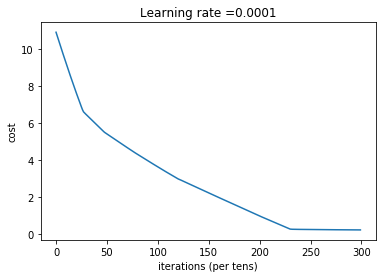

Parameters have been trained!
Train Accuracy: 0.9814032
Test Accuracy: 0.98094785


In [78]:
# 開始訓練模型 → 訓練完成後，儲存神經元權重參數 (parameters_c)
parameters_c = model(x_train_c, y_train_c, x_test_c, y_test_c, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 186645, print_cost = True)

X_train shape: (26, 186645)
Y_train shape: (1, 186645)
X_test shape: (26, 79991)
Y_test shape: (1, 79991)
Cost after epoch 0: 103.954758
Cost after epoch 100: 87.172409
Cost after epoch 200: 72.454445
Cost after epoch 300: 60.974995
Cost after epoch 400: 51.182899
Cost after epoch 500: 43.730885
Cost after epoch 600: 36.625908
Cost after epoch 700: 29.665306
Cost after epoch 800: 22.793308
Cost after epoch 900: 15.974102
Cost after epoch 1000: 9.186222
Cost after epoch 1100: 2.396575
Cost after epoch 1200: 0.456901
Cost after epoch 1300: 0.409305
Cost after epoch 1400: 0.367295


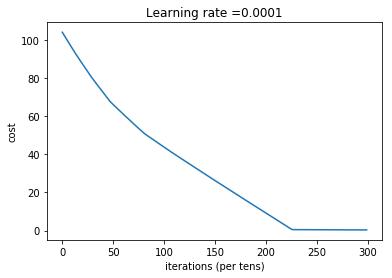

Parameters have been trained!
Train Accuracy: 0.9147847
Test Accuracy: 0.915603


In [79]:
# 重複處理資料的流程 & 訓練模型 (FX 外匯)
X_train_F, X_test_F, Y_train_F, Y_test_F = train_test_split(train, train_label[['FX_TXN_DT']], test_size=0.3, random_state=0)
x_train_F = X_train_F.transpose().values
x_test_F = X_test_F.transpose().values
y_train_F = Y_train_F.transpose().values
y_test_F = Y_test_F.transpose().values
print ("X_train shape: " + str(x_train_F.shape))
print ("Y_train shape: " + str(y_train_F.shape))
print ("X_test shape: " + str(x_test_F.shape))
print ("Y_test shape: " + str(y_test_F.shape))
x_train_F[x_train_F=='0Z'] = 0
parameters_f = model(x_train_F, y_train_F, x_test_F, y_test_F, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 186645, print_cost = True)

X_train shape: (26, 186645)
Y_train shape: (1, 186645)
X_test shape: (26, 79991)
Y_test shape: (1, 79991)
Cost after epoch 0: 3.613602
Cost after epoch 100: 1.389378
Cost after epoch 200: 0.645812
Cost after epoch 300: 0.552144
Cost after epoch 400: 0.485996
Cost after epoch 500: 0.428685
Cost after epoch 600: 0.377877
Cost after epoch 700: 0.330973
Cost after epoch 800: 0.287927
Cost after epoch 900: 0.253098
Cost after epoch 1000: 0.188085
Cost after epoch 1100: 0.157974
Cost after epoch 1200: 0.128979
Cost after epoch 1300: 0.109754
Cost after epoch 1400: 0.102546


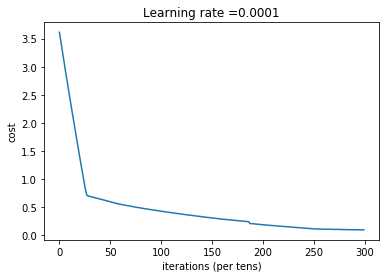

Parameters have been trained!
Train Accuracy: 0.9962924
Test Accuracy: 0.9965996


In [80]:
# 重複處理資料的流程 & 訓練模型 (LN 貸款)
X_train_L, X_test_L, Y_train_L, Y_test_L = train_test_split(train, train_label[['LN_TXN_DT']], test_size=0.3, random_state=0)
x_train_L = X_train_L.transpose().values
x_test_L = X_test_L.transpose().values
y_train_L = Y_train_L.transpose().values
y_test_L = Y_test_L.transpose().values
print ("X_train shape: " + str(x_train_L.shape))
print ("Y_train shape: " + str(y_train_L.shape))
print ("X_test shape: " + str(x_test_L.shape))
print ("Y_test shape: " + str(y_test_L.shape))
x_train_L[x_train_L=='0Z'] = 0
parameters_l = model(x_train_L, y_train_L, x_test_L, y_test_L, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 186645, print_cost = True)

X_train shape: (26, 186645)
Y_train shape: (1, 186645)
X_test shape: (26, 79991)
Y_test shape: (1, 79991)
Cost after epoch 0: 14.854955
Cost after epoch 100: 9.773635
Cost after epoch 200: 6.186873
Cost after epoch 300: 4.888187
Cost after epoch 400: 4.415226
Cost after epoch 500: 3.954591
Cost after epoch 600: 3.511671
Cost after epoch 700: 3.071671
Cost after epoch 800: 2.628092
Cost after epoch 900: 2.203768
Cost after epoch 1000: 1.834910
Cost after epoch 1100: 1.463176
Cost after epoch 1200: 1.086342
Cost after epoch 1300: 0.701592
Cost after epoch 1400: 0.348290


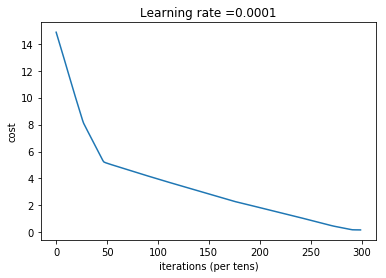

Parameters have been trained!
Train Accuracy: 0.9834338
Test Accuracy: 0.9823855


In [81]:
# 重複處理資料的流程 & 訓練模型 (WM 信貸)
X_train_W, X_test_W, Y_train_W, Y_test_W = train_test_split(train, train_label[['WM_TXN_DT']], test_size=0.3, random_state=0)
x_train_W = X_train_W.transpose().values
x_test_W = X_test_W.transpose().values
y_train_W = Y_train_W.transpose().values
y_test_W = Y_test_W.transpose().values
print ("X_train shape: " + str(x_train_W.shape))
print ("Y_train shape: " + str(y_train_W.shape))
print ("X_test shape: " + str(x_test_W.shape))
print ("Y_test shape: " + str(y_test_W.shape))
x_train_W[x_train_W=='0Z'] = 0
parameters_w = model(x_train_W, y_train_W, x_test_W, y_test_W, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 186645, print_cost = True)

In [82]:
# 利用訓練過後的模型，進行預測
def predict_new(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [26, 30000])
    
    z3 = forward_propagation_for_predict_new(x, params)
    p = tf.sigmoid(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict_new(X, parameters):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3
    

In [83]:
# Target Data 處理 → 轉換為模型的 Input Data
TA = pd.merge(T, cust_atri_4, how='left')
TA = TA.drop(['CUST_NO'],axis=1)
TA = TA.drop(['CC_IND'],axis=1)
TA = TA.drop(['FX_IND'],axis=1)
TA = TA.drop(['LN_IND'],axis=1)
TA = TA.drop(['WM_IND'],axis=1)
TA = TA.transpose().values
TA

array([[4.0, 2.0, 4.0, ..., 2.0, 2.0, 3.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [1.2265766651044148, 3.237454755491941, 1.0462968530629693, ...,
        3.82041564302783, 3.3002157180951546, 2.4013439449726195],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [4.275833825822794, 0.0, 3.6140708785395272, ..., 0.0,
        0.9000785304047751, 0.0],
       [5.0, 0.0, 2.0, ..., 0.0, 1.0, 0.0]], dtype=object)

In [84]:
# 根據剛才訓練出來的模型，針對目標的資料進行預測
c_ind = predict_new(TA, parameters_c)
f_ind = predict_new(TA, parameters_f)
l_ind = predict_new(TA, parameters_l)
w_ind = predict_new(TA, parameters_w)

In [85]:
# 將資料整併到 Try1 
Try1 = pd.DataFrame(c_ind.transpose(), columns = ['c_IND'])
Try1['f_IND'] = pd.DataFrame(f_ind.transpose(), columns = ['f_IND'])
Try1['l_IND'] = pd.DataFrame(l_ind.transpose(), columns = ['l_IND'])
Try1['w_IND'] = pd.DataFrame(w_ind.transpose(), columns = ['w_IND'])

In [86]:
# 將預測出來的數值進行四捨五入到整數位 → 作為預測結果
Try1 = Try1.round(decimals = 0)
Try1['CUST_NO'] = T['CUST_NO']
Try1 = Try1[['CUST_NO','c_IND','f_IND','l_IND','w_IND']]
Try1.sum()

CUST_NO    _PT5HFBEZJKOZ9346STXUMWZRDCGSDDUJDVF4U8JUANEID...
c_IND                                                      0
f_IND                                                     11
l_IND                                                      0
w_IND                                                      0
dtype: object

#### 從上列結果發現，僅有 外匯(fx) 有11筆數據為預測將購買
#### 故將全部的Training Data 都進去 model 做Training 會發生 Bias
#### (原始資料中，0 的比例過高，造成模型學習會有偏誤 → 採用其他抽樣方法)

In [88]:
# 重新處理資料 (resampling)
X_train_c.reset_index(inplace = True)
Y_train_c.reset_index(inplace = True)
X_train_c.reset_index(inplace = True)
Y_train_c.reset_index(inplace = True)

# 依照信用卡申請狀況排序，抓取 7000筆資料
Y_train_cP = Y_train_c.sort_values(by='cc_TXN_DT').tail(7000)
X_train_cP = X_train_c.iloc[Y_train_cP['level_0']]
Y_train_cP = Y_train_cP.drop(['level_0','index'], axis = 1)
X_train_cP = X_train_cP.drop(['level_0','index'], axis = 1)

x_train_cp = X_train_cP.transpose().values
y_train_cp = Y_train_cP.transpose().values

Cost after epoch 0: 246.808367
Cost after epoch 100: 67.864250
Cost after epoch 200: 1.197764
Cost after epoch 300: 0.927471
Cost after epoch 400: 0.849177
Cost after epoch 500: 0.806404
Cost after epoch 600: 0.805099
Cost after epoch 700: 0.806058
Cost after epoch 800: 0.804444
Cost after epoch 900: 0.802119
Cost after epoch 1000: 0.803004
Cost after epoch 1100: 0.801256
Cost after epoch 1200: 0.803638
Cost after epoch 1300: 0.802074
Cost after epoch 1400: 0.800266
Cost after epoch 1500: 0.798800
Cost after epoch 1600: 0.799274
Cost after epoch 1700: 0.797228


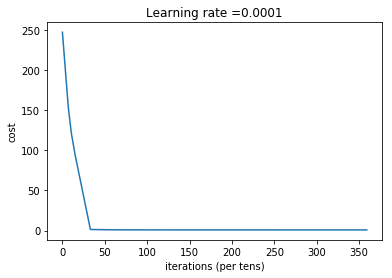

Parameters have been trained!
Train Accuracy: 0.5832857
Test Accuracy: 0.44387493


In [96]:
parameters_cp = model(x_train_cp, y_train_cp, x_test_c, y_test_c, learning_rate = 0.0001,
          num_epochs = 1800, minibatch_size = 1024, print_cost = True)

Cost after epoch 0: 1175.475098
Cost after epoch 100: 998.063354
Cost after epoch 200: 831.176147
Cost after epoch 300: 696.054016
Cost after epoch 400: 590.732239
Cost after epoch 500: 504.387115
Cost after epoch 600: 420.891907
Cost after epoch 700: 339.439941
Cost after epoch 800: 258.970062
Cost after epoch 900: 179.970032
Cost after epoch 1000: 101.428574
Cost after epoch 1100: 23.162004


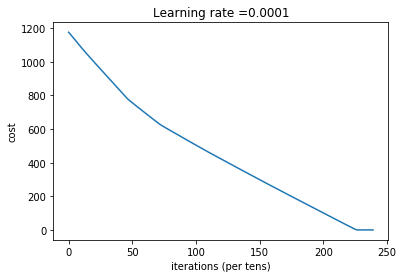

Parameters have been trained!
Train Accuracy: 0.9702857
Test Accuracy: 0.21663687


In [100]:
# 重新處理資料 (resampling) → 處理資料，重複進行機器學習
X_train_F.reset_index(inplace = True)
Y_train_F.reset_index(inplace = True)
X_train_F.reset_index(inplace = True)
Y_train_F.reset_index(inplace = True)

Y_train_FP = Y_train_F.sort_values(by='FX_TXN_DT').tail(7000)
X_train_FP = X_train_F.iloc[Y_train_FP['level_0']]
Y_train_FP = Y_train_FP.drop(['level_0','index'], axis = 1)
X_train_FP = X_train_FP.drop(['level_0','index'], axis = 1)

x_train_Fp = X_train_FP.transpose().values
y_train_Fp = Y_train_FP.transpose().values

parameters_Fp = model(x_train_Fp, y_train_Fp, x_test_F, y_test_F, learning_rate = 0.0001,
          num_epochs = 1200, minibatch_size = 7000, print_cost = True)

Cost after epoch 0: 20.240788
Cost after epoch 100: 5.904672
Cost after epoch 200: 0.488374
Cost after epoch 300: 0.433161
Cost after epoch 400: 0.395423
Cost after epoch 500: 0.362828
Cost after epoch 600: 0.328482
Cost after epoch 700: 0.313017
Cost after epoch 800: 0.302412
Cost after epoch 900: 0.297557
Cost after epoch 1000: 0.290599
Cost after epoch 1100: 0.287874
Cost after epoch 1200: 0.283619
Cost after epoch 1300: 0.280807
Cost after epoch 1400: 0.278948
Cost after epoch 1500: 0.276943
Cost after epoch 1600: 0.272972
Cost after epoch 1700: 0.272228


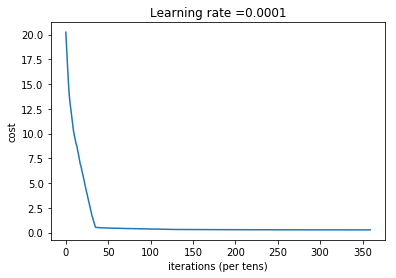

Parameters have been trained!
Train Accuracy: 0.9114286
Test Accuracy: 0.9839232


In [101]:
# 重新處理資料 (resampling) → 處理資料，重複進行機器學習

X_train_L.reset_index(inplace = True)
Y_train_L.reset_index(inplace = True)
X_train_L.reset_index(inplace = True)
Y_train_L.reset_index(inplace = True)

Y_train_LP = Y_train_L.sort_values(by='LN_TXN_DT').tail(7000)
X_train_LP = X_train_L.iloc[Y_train_LP['level_0']]
Y_train_LP = Y_train_LP.drop(['level_0','index'], axis = 1)
X_train_LP = X_train_LP.drop(['level_0','index'], axis = 1)

x_train_Lp = X_train_LP.transpose().values
y_train_Lp = Y_train_LP.transpose().values

parameters_Lp = model(x_train_Lp, y_train_Lp, x_test_L, y_test_L, learning_rate = 0.0001,
          num_epochs = 1800, minibatch_size = 1024, print_cost = True)

Cost after epoch 0: 316.446930
Cost after epoch 100: 235.576508
Cost after epoch 200: 155.449890
Cost after epoch 300: 119.771233
Cost after epoch 400: 106.219002
Cost after epoch 500: 95.177025
Cost after epoch 600: 85.037216
Cost after epoch 700: 75.030045
Cost after epoch 800: 64.923897
Cost after epoch 900: 54.716675
Cost after epoch 1000: 44.435532
Cost after epoch 1100: 34.115868


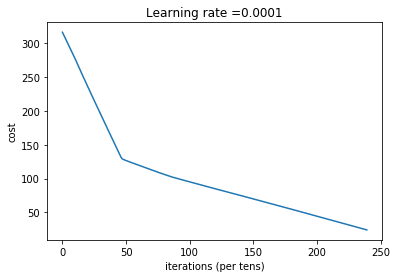

Parameters have been trained!
Train Accuracy: 0.75542855
Test Accuracy: 0.78887624


In [102]:
# 重新處理資料 (resampling) → 處理資料，重複進行機器學習
X_train_W.reset_index(inplace = True)
Y_train_W.reset_index(inplace = True)
X_train_W.reset_index(inplace = True)
Y_train_W.reset_index(inplace = True)

Y_train_WP = Y_train_W.sort_values(by='WM_TXN_DT').tail(7000)
X_train_WP = X_train_W.iloc[Y_train_WP['level_0']]
Y_train_WP = Y_train_WP.drop(['level_0','index'], axis = 1)
X_train_WP = X_train_WP.drop(['level_0','index'], axis = 1)

x_train_Wp = X_train_WP.transpose().values
y_train_Wp = Y_train_WP.transpose().values

parameters_Wp = model(x_train_Wp, y_train_Wp, x_test_W, y_test_W, learning_rate = 0.0001,
          num_epochs = 1200, minibatch_size = 7000, print_cost = True)

In [103]:
# 根據剛才訓練出來的模型，針對目標的資料進行預測
cp_ind = predict_new(TA, parameters_cp)
fp_ind = predict_new(TA, parameters_Fp)
lp_ind = predict_new(TA, parameters_Lp)
wp_ind = predict_new(TA, parameters_Wp)

In [104]:
# 將資料整併到 Try2 
Try2 = pd.DataFrame(cp_ind.transpose(), columns = ['CC_IND'])
Try2['FX_IND'] = pd.DataFrame(fp_ind.transpose(), columns = ['FX_IND'])
Try2['LN_IND'] = pd.DataFrame(lp_ind.transpose(), columns = ['LN_IND'])
Try2['WM_IND'] = pd.DataFrame(wp_ind.transpose(), columns = ['WM_IND'])

In [105]:
# 查看預測的數據
Try2 = Try2.round(decimals = 0)
Try2['CUST_NO'] = T['CUST_NO']
Try2 = Try2[['CUST_NO','CC_IND','FX_IND','LN_IND','WM_IND']]
Try2.sum()

CUST_NO    _PT5HFBEZJKOZ9346STXUMWZRDCGSDDUJDVF4U8JUANEID...
CC_IND                                                 24833
FX_IND                                                 27253
LN_IND                                                   786
WM_IND                                                  7893
dtype: object

In [ ]:
# 將客戶編號設為資料的index
Try2 = Try2.set_index('CUST_NO')
# 將 Data 輸出成 CSV
Try2.to_csv('ken_tensorflow1.csv')

## 總結
#### 最後的模型結果，以 貸款申請 (LN) & 信託產品 (WM) 的模型表現較好，測試集的正確率分別為 98%, 78%
#### 而 信用卡申辦 (CC) & 外匯產品 (FX) 的模型表現較不盡理想 (準確率分別為： 44%, 21%，
#### 模型仍有取多改善空間，例如 增加 hidden layers, resampling 可更加細化, 甚至是前置數據的處理, 整體訓練資料的準備等。
#### 歡迎大家提出任何意見、看法，一同交流學習！